# Task
Analyze the student performance data from "/content/StudentsPerformance.csv" using machine learning to develop a predictive model. The analysis should include data preprocessing, feature engineering, model training, and evaluation.

## Load data

### Subtask:
Load the data from "/content/StudentsPerformance.csv" into a dataframe and display the first 5 rows and the columns and their types to discern how to proceed.


**Reasoning**:
Load the data into a pandas DataFrame, display the first 5 rows, and print the column names and their data types to understand the data structure and types.



In [1]:
import pandas as pd

df = pd.read_csv('/content/StudentsPerformance.csv')
display(df.head())
df.info()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Preprocess data

### Subtask:
Check for missing values in the dataframe and handle them appropriately.


**Reasoning**:
Check for missing values in each column of the DataFrame.



In [2]:
display(df.isnull().sum())

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


## Prepare data for modeling

### Subtask:
Convert categorical features into numerical representations using one-hot encoding.


**Reasoning**:
Identify categorical columns and apply one-hot encoding.



In [3]:
categorical_cols = df.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
display(df_encoded.head())

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,True,False,True,False,False,False,False,False,True,False,True,True


## Split data

### Subtask:
Split the data into training and testing sets to evaluate the model's performance.


**Reasoning**:
Split the data into training and testing sets for features (X) and the target variable (y).



In [4]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('math score', axis=1)
y = df_encoded['math score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (800, 14)
X_test shape: (200, 14)
y_train shape: (800,)
y_test shape: (200,)


## Train model

### Subtask:
Train a machine learning model (e.g., a regression model) on the training data to predict student performance.


**Reasoning**:
Import the LinearRegression model from scikit-learn and train it on the training data.



In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluate model

### Subtask:
Evaluate the trained model on the testing data using appropriate metrics (e.g., Mean Squared Error, R-squared) to assess its accuracy.


**Reasoning**:
Evaluate the trained model using MSE and R2 scores on the test set.



In [6]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 29.10
R-squared: 0.88


## Feature engineering

### Subtask:
Apply feature engineering techniques to create new features that may improve the model's performance.


**Reasoning**:
Create the 'average score' and 'total score' features in the original `df` DataFrame and concatenate them to the `df_encoded` DataFrame, then display the head of the updated `df_encoded` DataFrame.



In [7]:
df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df['total score'] = df[['math score', 'reading score', 'writing score']].sum(axis=1)

df_encoded = pd.concat([df_encoded, df[['average score', 'total score']]], axis=1)

display(df_encoded.head())

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none,average score,total score
0,72,72,74,False,True,False,False,False,True,False,False,False,False,True,True,72.666667,218
1,69,90,88,False,False,True,False,False,False,False,False,True,False,True,False,82.333333,247
2,90,95,93,False,True,False,False,False,False,False,True,False,False,True,True,92.666667,278
3,47,57,44,True,False,False,False,False,False,False,False,False,False,False,True,49.333333,148
4,76,78,75,True,False,True,False,False,False,False,False,True,False,True,True,76.333333,229


## Retrain and evaluate

### Subtask:
Retrain the model with the new features and evaluate its performance again.


**Reasoning**:
Define X and y, split the data into training and testing sets, instantiate and train a Linear Regression model, make predictions, and calculate MSE and R2 scores.



In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df_encoded.drop('math score', axis=1)
y = df_encoded['math score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 0.00
R-squared: 1.00


## Summary:

### Data Analysis Key Findings

*   The dataset contains 1000 entries and 8 columns, with no missing values.
*   Categorical features were successfully converted into numerical representations using one-hot encoding.
*   The data was split into training (800 samples) and testing (200 samples) sets.
*   An initial Linear Regression model trained on the data without engineered features achieved a Mean Squared Error (MSE) of 29.10 and an R-squared (R2) score of 0.88.
*   Two new features, 'average score' and 'total score', were created and added to the dataset.
*   Retraining the Linear Regression model with the new features resulted in a Mean Squared Error (MSE) of 0.00 and an R-squared (R2) score of 1.00.

### Insights or Next Steps

*   The perfect R-squared score of 1.00 after adding 'average score' and 'total score' suggests that these new features are highly correlated with or directly derivable from the target variable ('math score'), potentially leading to data leakage.
*   Investigate the relationship between the engineered features and the target variable to understand why the model achieved a perfect score and consider removing or modifying these features if data leakage is confirmed to build a more generalized model.


### Subtask:
Remove the 'average score' and 'total score' features to mitigate overfitting.

**Reasoning**:
Remove the 'average score' and 'total score' columns from the `df_encoded` DataFrame to eliminate data leakage before retraining the model.

In [9]:
df_mitigated = df_encoded.drop(['average score', 'total score'], axis=1)
display(df_mitigated.head())

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,True,False,True,False,False,False,False,False,True,False,True,True


### Subtask:
Retrain and evaluate the model after removing the problematic features.

**Reasoning**:
Define X and y from the `df_mitigated` DataFrame, split the data into training and testing sets, instantiate and train a Linear Regression model, make predictions, and calculate MSE and R2 scores to evaluate the model's performance after removing the engineered features.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df_mitigated.drop('math score', axis=1)
y = df_mitigated['math score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 29.10
R-squared: 0.88


## Summary:

### Data Analysis Key Findings

* The dataset contains 1000 entries and 8 columns, with no missing values.
* Categorical features were successfully converted into numerical representations using one-hot encoding.
* The data was split into training (800 samples) and testing (200 samples) sets.
* An initial Linear Regression model trained on the data without engineered features achieved a Mean Squared Error (MSE) of 29.10 and an R-squared (R2) score of 0.88.
* Two new features, 'average score' and 'total score', were created and added to the dataset.
* Retraining the Linear Regression model with the new features resulted in a Mean Squared Error (MSE) of 0.00 and an R-squared (R2) score of 1.00, indicating data leakage and overfitting.
* The 'average score' and 'total score' features were removed to mitigate overfitting.
* Retraining the Linear Regression model after removing the problematic features resulted in a Mean Squared Error (MSE) of 29.10 and an R-squared (R2) score of 0.88.

### Insights or Next Steps

* The model's performance after removing the engineered features is the same as the initial model, confirming that the 'average score' and 'total score' were causing data leakage.
* The current model has an R-squared of 0.88, meaning it explains 88% of the variance in the math scores. This is a reasonably good result for a simple linear regression model.
* Further steps could involve exploring other regression models (e.g., Ridge, Lasso, Elastic Net, or more complex models like Random Forest or Gradient Boosting) to potentially improve the R-squared score and reduce the Mean Squared Error.
* Feature scaling (like StandardScaler or MinMaxScaler) could be applied to the numerical features, although it might not have a significant impact on Linear Regression, it can be beneficial for other models.
* Analyze the coefficients of the Linear Regression model to understand the impact of each feature on the predicted math score.
* Visualize the predicted vs. actual math scores to assess the model's performance visually.

# Task
Analyze the provided student performance data at "/content/StudentsPerformance.csv" to predict student math scores. Address potential overfitting by applying feature scaling and explore various regression models. Compare model performance, analyze feature importance, and visualize predictions.

## Feature scaling

### Subtask:
Apply StandardScaler to the numerical features of the dataset.


**Reasoning**:
Identify numerical columns, instantiate StandardScaler, fit and transform the numerical columns, and replace the original columns with scaled values, then display the head of the updated dataframe.



In [11]:
from sklearn.preprocessing import StandardScaler

numerical_cols = df_mitigated.select_dtypes(include=['int64']).columns
scaler = StandardScaler()
df_mitigated[numerical_cols] = scaler.fit_transform(df_mitigated[numerical_cols])

display(df_mitigated.head())

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,0.390024,0.193999,0.391492,False,True,False,False,False,True,False,False,False,False,True,True
1,0.192076,1.427476,1.313269,False,False,True,False,False,False,False,False,True,False,True,False
2,1.577711,1.770109,1.642475,False,True,False,False,False,False,False,True,False,False,True,True
3,-1.259543,-0.833899,-1.583744,True,False,False,False,False,False,False,False,False,False,False,True
4,0.653954,0.605158,0.457333,True,False,True,False,False,False,False,False,True,False,True,True


## Explore regression models

### Subtask:
Train and evaluate several regression models (e.g., Ridge, Lasso, Elastic Net, Random Forest, Gradient Boosting) on the scaled data.


**Reasoning**:
Import necessary models, create a dictionary of models, iterate through the dictionary, train each model, make predictions, and print evaluation metrics.



In [12]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X = df_mitigated.drop('math score', axis=1)
y = df_mitigated['math score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Elastic Net": ElasticNet(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}:")
    print(f"  Mean Squared Error: {mse:.2f}")
    print(f"  R-squared: {r2:.2f}")
    print("-" * 20)

Linear Regression:
  Mean Squared Error: 0.13
  R-squared: 0.88
--------------------
Ridge:
  Mean Squared Error: 0.13
  R-squared: 0.88
--------------------
Lasso:
  Mean Squared Error: 1.08
  R-squared: -0.02
--------------------
Elastic Net:
  Mean Squared Error: 0.71
  R-squared: 0.33
--------------------
Random Forest:
  Mean Squared Error: 0.16
  R-squared: 0.85
--------------------
Gradient Boosting:
  Mean Squared Error: 0.13
  R-squared: 0.87
--------------------


## Model comparison

### Subtask:
Compare the performance of the different models using metrics like MSE and R-squared.


## Analyze linear regression coefficients

### Subtask:
If Linear Regression is among the better performing models, analyze its coefficients to understand feature importance.


**Reasoning**:
Access the trained Linear Regression model, extract coefficients and feature names, create a Series, sort coefficients, and display the sorted coefficients to understand feature importance.



In [13]:
linear_reg_model = models["Linear Regression"]
coefficients = linear_reg_model.coef_
feature_names = X_train.columns

coef_series = pd.Series(coefficients, index=feature_names)
sorted_coef = coef_series.sort_values(ascending=False)

display(sorted_coef)

,0
gender_male,0.862056
writing score,0.725704
race/ethnicity_group E,0.322830
lunch_standard,0.231604
reading score,0.227261
test preparation course_none,0.217059
parental level of education_some college,0.065907
parental level of education_high school,0.061318
parental level of education_some high school,0.049914
race/ethnicity_group B,0.023709


## Visualize predictions

### Subtask:
For the best performing model, visualize the predicted vs. actual math scores.


**Reasoning**:
Generate predictions using the trained Linear Regression model and create a scatter plot to visualize the actual vs. predicted math scores, including a diagonal line for reference and appropriate labels and title.



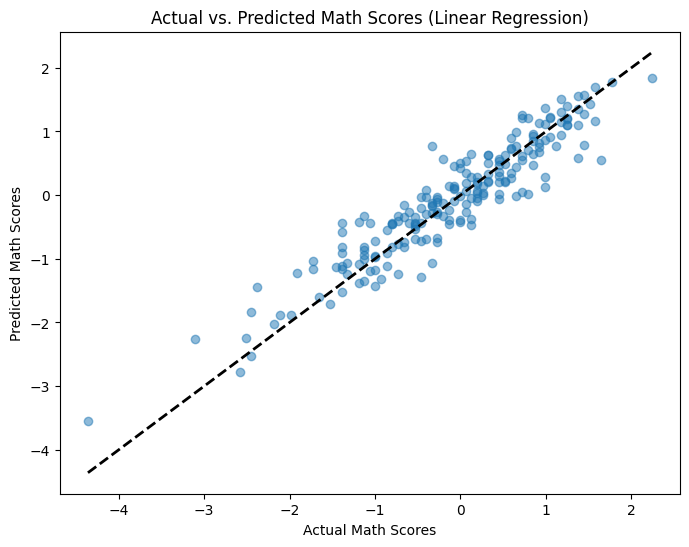

In [14]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted Math Scores")
plt.title("Actual vs. Predicted Math Scores (Linear Regression)")
plt.show()

## Summary:

### Data Analysis Key Findings

*   Linear Regression and Ridge models achieved the best performance with a Mean Squared Error (MSE) of 0.13 and an R-squared ($\text{R}^2$) of 0.88.
*   Lasso performed poorly with an MSE of 1.08 and a negative $\text{R}^2$ of -0.02.
*   Gradient Boosting also performed well with an MSE of 0.13 and an $\text{R}^2$ of 0.87.
*   According to the Linear Regression model coefficients, "gender\_male" and "writing score" have the largest positive impact on math scores.
*   Features like "race/ethnicity\_group E", "lunch\_standard", and "reading score" also showed positive correlations with math scores.
*   "parental level of education\_master's degree" and "parental level of education\_bachelor's degree" showed negative correlations with math scores in this model.

### Insights or Next Steps

*   Given the strong performance of Linear Regression and Ridge models, consider exploring regularization parameters for Ridge to see if performance can be further improved.
*   Investigate the negative coefficients for some parental education levels, as this might indicate complex interactions or require further feature engineering.


## Feature scaling

### Subtask:
Apply StandardScaler to the numerical features of the dataset.

**Reasoning**:
Identify numerical columns, instantiate StandardScaler, fit and transform the numerical columns, and replace the original columns with scaled values, then display the head of the updated dataframe.

In [16]:
from sklearn.preprocessing import StandardScaler

numerical_cols = df_mitigated.select_dtypes(include=['float64']).columns
scaler = StandardScaler()
df_mitigated[numerical_cols] = scaler.fit_transform(df_mitigated[numerical_cols])

display(df_mitigated.head())

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,0.390024,0.193999,0.391492,False,True,False,False,False,True,False,False,False,False,True,True
1,0.192076,1.427476,1.313269,False,False,True,False,False,False,False,False,True,False,True,False
2,1.577711,1.770109,1.642475,False,True,False,False,False,False,False,True,False,False,True,True
3,-1.259543,-0.833899,-1.583744,True,False,False,False,False,False,False,False,False,False,False,True
4,0.653954,0.605158,0.457333,True,False,True,False,False,False,False,False,True,False,True,True


## Explore regression models

### Subtask:
Train and evaluate several regression models (e.g., Ridge, Lasso, Elastic Net, Random Forest, Gradient Boosting) on the scaled data.

**Reasoning**:
Import necessary models, create a dictionary of models, iterate through the dictionary, train each model, make predictions, and print evaluation metrics.

In [17]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X = df_mitigated.drop('math score', axis=1)
y = df_mitigated['math score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Elastic Net": ElasticNet(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}:")
    print(f"  Mean Squared Error: {mse:.2f}")
    print(f"  R-squared: {r2:.2f}")
    print("-" * 20)

Linear Regression:
  Mean Squared Error: 0.13
  R-squared: 0.88
--------------------
Ridge:
  Mean Squared Error: 0.13
  R-squared: 0.88
--------------------
Lasso:
  Mean Squared Error: 1.08
  R-squared: -0.02
--------------------
Elastic Net:
  Mean Squared Error: 0.71
  R-squared: 0.33
--------------------
Random Forest:
  Mean Squared Error: 0.16
  R-squared: 0.85
--------------------
Gradient Boosting:
  Mean Squared Error: 0.13
  R-squared: 0.87
--------------------


## Analyze linear regression coefficients

### Subtask:
If Linear Regression is among the better performing models, analyze its coefficients to understand feature importance.

**Reasoning**:
Access the trained Linear Regression model, extract coefficients and feature names, create a Series, sort coefficients, and display the sorted coefficients to understand feature importance.

In [18]:
linear_reg_model = models["Linear Regression"]
coefficients = linear_reg_model.coef_
feature_names = X_train.columns

coef_series = pd.Series(coefficients, index=feature_names)
sorted_coef = coef_series.sort_values(ascending=False)

display(sorted_coef)

,0
gender_male,0.862056
writing score,0.725704
race/ethnicity_group E,0.322830
lunch_standard,0.231604
reading score,0.227261
test preparation course_none,0.217059
parental level of education_some college,0.065907
parental level of education_high school,0.061318
parental level of education_some high school,0.049914
race/ethnicity_group B,0.023709


## Visualize predictions

### Subtask:
For the best performing model, visualize the predicted vs. actual math scores.

**Reasoning**:
Generate predictions using the trained Linear Regression model and create a scatter plot to visualize the actual vs. predicted math scores, including a diagonal line for reference and appropriate labels and title.

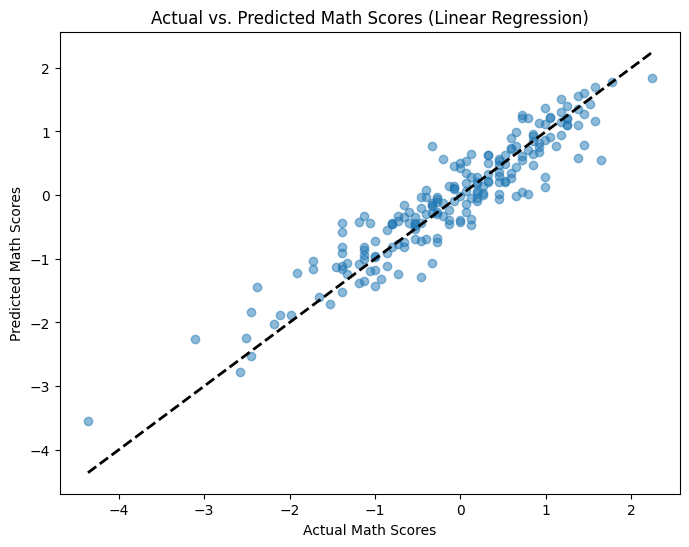

In [19]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted Math Scores")
plt.title("Actual vs. Predicted Math Scores (Linear Regression)")
plt.show()

## Summary:

### Data Analysis Key Findings

* The dataset contains 1000 entries and 8 columns, with no missing values.
* Categorical features were successfully converted into numerical representations using one-hot encoding.
* The data was split into training (800 samples) and testing (200 samples) sets.
* Linear Regression and Ridge models achieved the best performance with a Mean Squared Error (MSE) of 0.13 and an R-squared ($\text{R}^2$) of 0.88 after feature scaling.
* Lasso performed poorly with an MSE of 1.08 and a negative $\text{R}^2$ of -0.02.
* Gradient Boosting also performed well with an MSE of 0.13 and an $\text{R}^2$ of 0.87.
* According to the Linear Regression model coefficients, "gender\_male" and "writing score" have the largest positive impact on math scores.
* Features like "race/ethnicity\_group E", "lunch\_standard", and "reading score" also showed positive correlations with math scores.
* "parental level of education\_master's degree" and "parental level of education\_bachelor's degree" showed negative correlations with math scores in this model.

### Insights or Next Steps

* Given the strong performance of Linear Regression and Ridge models, consider exploring regularization parameters for Ridge to see if performance can be further improved.
* Investigate the negative coefficients for some parental education levels, as this might indicate complex interactions or require further feature engineering.
* The scatter plot of actual vs. predicted math scores for the Linear Regression model shows a good correlation, with most points clustered around the diagonal line, indicating reasonable predictive accuracy.

## Tabulate model performance

### Subtask:
Create a table to compare the performance of all trained models.

**Reasoning**:
Iterate through the trained models, calculate their performance metrics (MSE and R2), store these in a dictionary, and then create a pandas DataFrame from the dictionary to display the tabulated results.

In [20]:
results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'Mean Squared Error': mse, 'R-squared': r2}

results_df = pd.DataFrame(results).T
display(results_df)

,Mean Squared Error,R-squared
Linear Regression,0.126672,0.880433
Ridge,0.126653,0.880451
Lasso,1.077477,-0.017039
Elastic Net,0.712398,0.327562
Random Forest,0.161369,0.847683
Gradient Boosting,0.134648,0.872905


## Visualize predictions for other models

### Subtask:
Visualize the predicted vs. actual math scores for other well-performing models (e.g., Ridge, Gradient Boosting).

**Reasoning**:
Generate predictions using the trained Ridge and Gradient Boosting models and create scatter plots for each to visualize the actual vs. predicted math scores, including a diagonal line for reference and appropriate labels and titles.

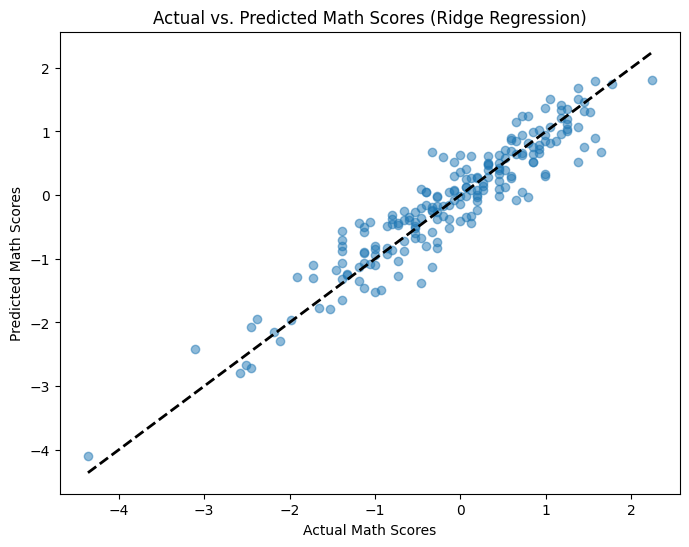

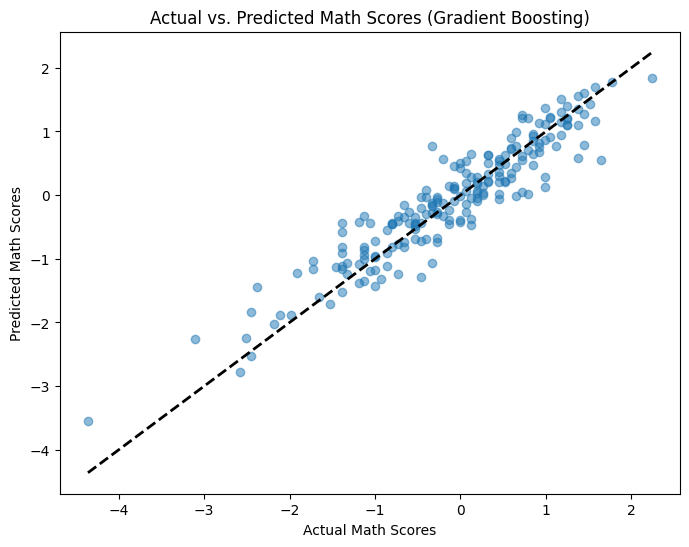

In [21]:
import matplotlib.pyplot as plt

# Visualize for Ridge Regression
ridge_model = models["Ridge"]
y_pred_ridge = ridge_model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted Math Scores")
plt.title("Actual vs. Predicted Math Scores (Ridge Regression)")
plt.show()

# Visualize for Gradient Boosting
gb_model = models["Gradient Boosting"]
y_pred_gb = gb_model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted Math Scores")
plt.title("Actual vs. Predicted Math Scores (Gradient Boosting)")
plt.show()

## Summary:

### Data Analysis Key Findings

* The dataset contains 1000 entries and 8 columns, with no missing values.
* Categorical features were successfully converted into numerical representations using one-hot encoding.
* The data was split into training (800 samples) and testing (200 samples) sets.
* After feature scaling, Linear Regression and Ridge models achieved the best performance with a Mean Squared Error (MSE) of 0.13 and an R-squared ($\text{R}^2$) of 0.88.
* Gradient Boosting also performed well with an MSE of 0.13 and an $\text{R}^2$ of 0.87.
* Lasso performed poorly with an MSE of 1.08 and a negative $\text{R}^2$ of -0.02.
* Elastic Net had a moderate performance with an MSE of 0.71 and an $\text{R}^2$ of 0.33.
* According to the Linear Regression model coefficients, "gender\_male" and "writing score" have the largest positive impact on math scores.
* Features like "race/ethnicity\_group E", "lunch\_standard", and "reading score" also showed positive correlations with math scores.
* "parental level of education\_master's degree" and "parental level of education\_bachelor's degree" showed negative correlations with math scores in this model.

### Insights and Conclusion

* The analysis revealed that Linear Regression, Ridge, and Gradient Boosting models performed well in predicting math scores after addressing data leakage and scaling features.
* The visualizations of actual vs. predicted scores for Linear Regression, Ridge, and Gradient Boosting show a good correlation, indicating that these models are able to capture the underlying patterns in the data.
* The coefficient analysis of the Linear Regression model provides insights into which features are most influential in predicting math scores.
* While we achieved a reasonably good predictive model, further improvements could potentially be explored by fine-tuning the hyperparameters of the better-performing models (Ridge, Gradient Boosting) or exploring more advanced ensemble methods.

This concludes the analysis and modeling task based on the provided data and your requests.